# Problem 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

1. Loading dataset for both training and testing

In [4]:
data = np.genfromtxt('D:/MachineLearning/hw2/credit.txt', delimiter=None, dtype=None, encoding='utf8',names=True)
df = pd.DataFrame(data)
df

,Name,Debt,Income,Married,Owns_Property,Gender,Risk
0,Tim,low,low,no,no,male,low
1,Joe,high,high,yes,yes,male,low
2,Sue,low,high,yes,no,female,low
3,John,medium,low,no,no,male,high
4,Mary,high,low,yes,no,female,high
5,Fred,low,low,yes,no,male,high
6,Pete,low,medium,no,yes,male,low
7,Jacob,high,medium,yes,yes,male,low
8,Sofia,medium,low,no,no,female,low


In [5]:
test_data = {
    "Name": ["Tom", "Ana"],
    "Debt": ["low", "low"],
    "Income": ["low", "medium"],
    "Married": ["no", "yes"],
    "Owns_Property": ["Yes", "Yes"],
    "Gender": ["Male", "female"]
}
test = pd.DataFrame(test_data)
test

,Name,Debt,Income,Married,Owns_Property,Gender
0,Tom,low,low,no,Yes,Male
1,Ana,low,medium,yes,Yes,female


2. Using LabelEncoder to change the values to numerical format and further training the tree

In [7]:
le = LabelEncoder()
for column in ['Debt', 'Income', 'Married', 'Owns_Property', 'Gender']:
    df[column] = le.fit_transform(df[column])
    test[column] = le.fit_transform(test[column])

X = df[['Debt', 'Income', 'Married', 'Owns_Property', 'Gender']]
x_test = test[['Debt', 'Income', 'Married', 'Owns_Property', 'Gender']]
y = le.fit_transform(df['Risk'])

In [8]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

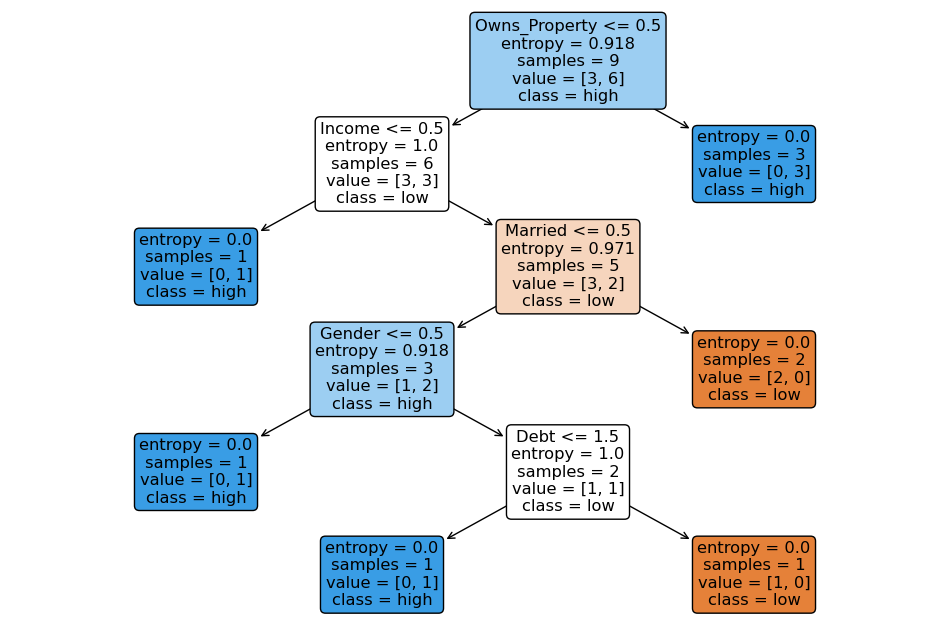

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Debt', 'Income', 'Married', 'Owns_Property', 'Gender'], class_names=['low', 'high'], filled=True, rounded=True)
plt.show()

In [10]:
y_pred = tree.predict(x_test)
y_pred

array([1, 0])

We get the predictions for Tom and Ana as Low and High

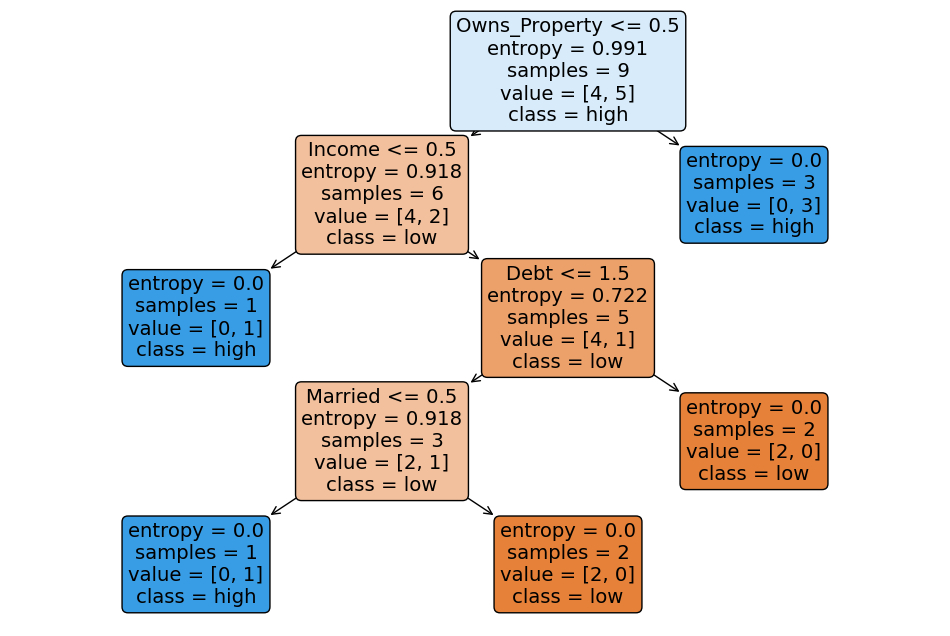

In [12]:
# Change Sofia's risk to high
df.loc[df['Name'] == 'Sofia', 'Risk'] = 'high'
# Retrain the model
tree.fit(X, le.fit_transform(df['Risk']))

# Visualize the updated tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Debt', 'Income', 'Married', 'Owns_Property', 'Gender'], class_names=['low', 'high'], filled=True, rounded=True)
plt.show()

After changing the Risk value for Sonia as High, we can observe the change in the Decision Tree. The Gender attribute is not used for splitting/ classification.

Also we observe that, the Name attribute does not play any role in the Decision Tree. Therefore, if any feature is not used in the splits, it means the tree doesn’t find it valuable for classification based on the current dataset.